<img src="logo_ups.jpg" alt="Drawing" style="width: 200px;"/>

# Problème : Traitement d'image
## Contexte

Durant cette séance nous allons nous intéresser à certaines transformations bijectives d’une image. Ce type de transformation déplace les points d’une image d’un endroit à un autre sans en ajouter ni en enlever aucun. De fait ceci revient à
appliquer une permutation sur l’ensemble des points d’une image.
Une propriété remarquable de ces transformations bijectives est qu’elles reviennent toujours au point de départ après
un nombre d’applications plus ou moins important : c’est une conséquence du fait que le groupe des permutations d’un
ensemble fini est d’ordre fini donc tous ses éléments aussi. Par exemple, la transformée par symétrie de l’image par rapport
à un axe vertical passant par son milieu est d’ordre 2, tandis que la transformée par rotation d’un quart de tour est d’ordre
4.

Pour ce TP nous aurons besoin des deux bibliothèques suivantes : `numpy` et `matplotlib.pyplot`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

La seconde bibliothèque contient deux fonctions que nous utiliserons :
* la fonction `plt.imread` prend en argument une chaîne de caractère décrivant le chemin d’accès à un fichier image
au format png et retourne un tableau `numpy`. Ce tableau a même dimension que l’image, et chacune de ses cases
contient un triplet donnant les composantes RGB du pixel correspondant.
* la fonction `plt.imshow` prend en argument un tableau numpy et affiche l’image associée à cette matrice (faire
éventuellement suivre cette commande de l’instruction plt.show() si le mode interactif n’est pas activé).



### Exemple
La ligne suivante convertit l’image `father.png` en une matrice numpy nommée `father`.

In [2]:
father = plt.imread('father.png')

Cette seconde ligne affiche cette matrice-image à l’écran.

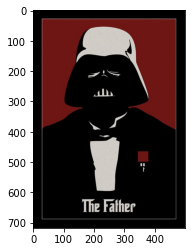

In [3]:
plt.imshow(father)

Chaque case contient un vecteur RGB de taille 3 définissant la couleur du pixel. Par exemple, le case à la position `(34,67)` contient le vecteur RGB `[0.43137255, 0.08627451, 0.07843138]`

In [4]:
father[34,67]

array([0.43137255, 0.08627451, 0.07843138], dtype=float32)

Dans les deux questions suivantes, vous devrez calculer les transformées de cette image, d’abord par une symétrie  puis par une rotation. Mais plutôt que de transformer l’image elle-même, vous calculerez une nouvelle image contenant l’image transformée (c’est beaucoup plus simple). À partir d’une matrice-image vierge, il faudra recopier chacun des pixels de la matrice-image initiale à son nouvel emplacement dans la matrice-image vierge.

## Question 1 : Symétrie
Dans le cas d’une symétrie d’axe vertical, l’image transformée à les mêmes dimensions que l’image initiale. Pour créer la matrice-image vierge, vous utiliserez l’instruction `np.empty_like(img)` qui prend en entrée une matrice `img` et qui renvoie une matrice vierge de mêmes dimensions.

Étant donné un pixel $a$ de coordonnées $a=(x,y)$ dans l’image initiale, ses coordonnées $(x',y')$ dans l’image transformée par une symétrie d’axe vertical passant par le centre de l’image sont données par : 
$$\left\{ \begin{eqnarray} x' & = & x \\ y'  & = & q−1−y \end{eqnarray} \right.$$

<img src="svert.png" alt="Drawing" style="width: 800px;"/>

Ecrivez une fonction `sym(x,y,p,q)` qui prend entrée les coordonnées d'un pixel (`x`,`y`) et la taille d'une image (`p`,`q`) et renvoie les coordonnées du pixel trandsformé par la symétrie verticale décrite plus haut.      


In [5]:
def sym(x,y,p,q): 
        return x,q-1-y

A l'aide de la fonction `sym`, écrivez une fonction `symetrie(img)` qui prend en entrée une matrice-image `img` et qui renvoie une nouvelle matrice-image transformée par la symétrie d’axe vertical. Les dimensions $p\times q$ de l’image initiale peuvent être calculées par les instructions :
* `p = img.shape[0]`
* `q = img.shape[1]`

Vous testerez votre fonction en faisant apparaître à l’écran le résultat de `symetrie(father)`.



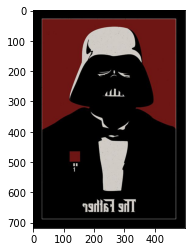

In [6]:
def symetrie(img):
    p = img.shape[0]
    q = img.shape[1] 
    img2 = np.empty_like(img)
    for x in range(p):
        for y in range(q):
            img2[sym(x,y,p,q)] = img[x, y]
    return img2

plt.imshow(symetrie(father))

## Question 2 : Découpage en 4 et assemblage. 

Cette transformation « réduit » la taille de l’image de moitié pour obtenir quatre morceaux analogues qui sont ensuite placés en carré pour obtenir une image de même taille que l’image d’origine. Pour que cette transformation soit bijective, l'image initiale est tout d'abord découpée en paquets carrés de quatre pixels $(2\times2)$ puis pour chaque paquet carré de quatre pixels :
* le pixel en haut à gauche est utilisé pour l’image réduite en haut à gauche
* le pixel en haut à droite est utilisé pour l’image réduite en haut à droite 
* etc...

<img src="photo.png" alt="Drawing" style="width: 800px;"/>

Étant donné un pixel $a$ de coordonnées $a=(x,y)$ dans l’image initiale, ses coordonnées $(x',y')$ dans l’image transformée par la transformation de découpage décrite précédemment est données par :
$$(x',y')=\left\{ \begin{align}
&\left( \left\lfloor \frac{x}{2} \right\rfloor,\left\lfloor \frac{y}{2} \right\rfloor \right) && \text{si } x \text{ et } y \text{ sont pairs } \\
&\left( \left\lfloor \frac{x}{2} \right\rfloor,\left\lfloor \frac{y}{2} \right\rfloor + \left\lfloor \frac{q}{2} \right\rfloor \right) && \text{si } x \text{ est pair et } y \text{ est impair } \\
&\left( \left\lfloor \frac{x}{2} \right\rfloor + \left\lfloor \frac{p}{2} \right\rfloor,\left\lfloor \frac{y}{2} \right\rfloor \right) && \text{si } x \text{ est impair et } y \text{ est pair }\\
&\left( \left\lfloor \frac{x}{2} \right\rfloor + \left\lfloor \frac{p}{2} \right\rfloor,\left\lfloor \frac{y}{2} \right\rfloor +\left\lfloor \frac{q}{2} \right\rfloor \right)&&  \text{si } x \text{ et } y \text{ sont impairs }
\end{align} \right.$$

où $\left\lfloor \dfrac{x}{y} \right\rfloor$ désigne en python `x//y` le résultat de la division entière de `x` par `y`.

Ecrivez une fonction `decoup(x,y,p,q)` qui prend entrée les coordonnées d'un pixel (`x`,`y`) et la taille d'une image (`p`,`q`) et renvoie les coordonnées du pixel trandsformé par la transformation décrite plus haut.      



In [7]:
def decoup(x,y,p,q): 
    if x % 2 == 0 and y % 2 == 0 :
        return x//2 , y//2
    elif x % 2 == 0 and y % 2 != 0 :
        return x//2 , y//2 + q//2 
    elif x % 2 != 0 and y % 2 == 0 :
        return x//2 + p//2 ,y//2
    else:
        return x//2 + p//2 ,y//2 + q//2 

A l'aide de la fonction `decoup`, ecrivez une fonction `decoupage(img)` qui prend en entrée une matrice-image `img` et qui renvoie une nouvelle matrice-image transformée par la transformation de découpage. Vous testerez votre fonction en faisant apparaître à l’écran le résultat de `decoupage(father)`.

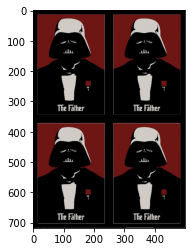

In [8]:
def decoupage(img):
    p = img.shape[0]
    q = img.shape[1] 
    img2 = np.empty_like(img) 
    for x in range(p):
        for y in range(q):
            img2[decoup(x,y, p, q)] = img[x, y]
    return img2

plt.imshow(decoupage(father))



## Question 3 : Retour d'un pixel à sa place initiale
Le but de cette question est trouver le nombre de fois qu'il faut appliquer une tranformation bijective `f` à une image pour qu'elle revienne à l'identique.  

Ecrivez une fonction `retour_pixel(f,x, y, p, q)` qui prend en entrée :
* les coordonnées (`x`,`y`) d’un pixel 
* la taille (`p`,`q`) de l’image auquel il appartient 

qui retourne le nombre de fois qu'il faut appliquer `f` à (`x`,`y`) pour qu'il revienne à sa place initiale. 

Vous appliquerez votre fonction `retour_pixel` à la symétrie verticale et au découpage/assemblage à l'aide des fonctions `sym` et `decoup` . Que peut-on en conclure ? 

In [9]:
def retour_pixel(f,x, y, p, q):
    x1, y1 = f(x, y, p, q)
    n=1
    while (x1, y1) != (x, y):
        n += 1
        x1, y1 = f(x1, y1, p, q)
    return n

print(retour_pixel(sym,100, 50, 717, 500))
print(retour_pixel(decoup,100, 50, 717, 500))

2
4980
